In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

dtype = torch.FloatTensor
input_size, hidden_size, output_size = 7, 6, 1
epochs = 600
seq_length = 20
lr = 0.04

xx = np.linspace(2, 10, 20)
yy = np.sin(xx)

x = torch.Tensor(xx.reshape(-1, 1))
y = torch.Tensor(yy.reshape(-1,1))

In [15]:
w1 = torch.FloatTensor(input_size, hidden_size).type(dtype)
torch.nn.init.normal_(w1, 0.0, 0.4)
w1 =  Variable(w1, requires_grad=True)
w2 = torch.FloatTensor(hidden_size, output_size).type(dtype)
torch.nn.init.normal_(w2, 0.0, 0.3)
w2 = Variable(w2, requires_grad=True)

def forward(input, context_state, w1, w2):
    xh = torch.cat((input, context_state), 1)
    context_state = torch.tanh(xh.mm(w1))
    out = context_state.mm(w2)
    return (out, context_state)

In [16]:
for i in range(epochs):
    total_loss = 0
    context_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad=True)

    for j in range(x.size(0)):
        input = x[j:(j+1)]
        target = y[j:(j+1)]
        (pred, context_state) = forward(input, context_state, w1, w2)
        loss = (pred - target).pow(2).sum()/2
        total_loss += loss
        loss.backward()
        w1.data -= lr * w1.grad.data
        w2.data -= lr * w2.grad.data
        w1.grad.data.zero_()
        w2.grad.data.zero_()
        context_state = Variable(context_state.data)
    if i % 10 == 0:
        print("Epoch: {} loss {}".format(i, total_loss))

Epoch: 0 loss 4.535204887390137
Epoch: 10 loss 3.720723867416382
Epoch: 20 loss 3.2499608993530273
Epoch: 30 loss 2.8863415718078613
Epoch: 40 loss 2.6163241863250732
Epoch: 50 loss 2.1446268558502197
Epoch: 60 loss 1.4017281532287598
Epoch: 70 loss 0.8715076446533203
Epoch: 80 loss 0.6922672986984253
Epoch: 90 loss 0.6202428340911865
Epoch: 100 loss 0.5537925958633423
Epoch: 110 loss 0.4843347370624542
Epoch: 120 loss 0.41940993070602417
Epoch: 130 loss 0.36551323533058167
Epoch: 140 loss 0.32789480686187744
Epoch: 150 loss 0.3060152530670166
Epoch: 160 loss 0.29262638092041016
Epoch: 170 loss 0.2832096815109253
Epoch: 180 loss 0.2754976749420166
Epoch: 190 loss 0.2671950161457062
Epoch: 200 loss 0.24944788217544556
Epoch: 210 loss 0.29658836126327515
Epoch: 220 loss 0.3071081340312958
Epoch: 230 loss 0.27835211157798767
Epoch: 240 loss 0.2610558569431305
Epoch: 250 loss 0.27513977885246277
Epoch: 260 loss 0.2668553590774536
Epoch: 270 loss 0.2716168165206909
Epoch: 280 loss 0.2771315

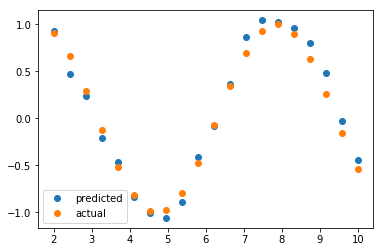

In [17]:
context_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad=False)
predictions = []

for i in range(x.size(0)):
    input = x[i:i+1]
    (pred, context_state) = forward(input, context_state, w1, w2)
    context_state = context_state
    predictions.append(pred.data.numpy().ravel()[0])
    
ln_pred = plt.plot(xx, predictions, 'o', label='predicted')
ln_data = plt.plot(xx, yy, 'o', label='actual')

plt.legend()